In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Read datasets into pandas dataframe
store = pd.read_excel('store.xlsx')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_excel('sample_submission.xlsx')

C:\Users\Personal PC\AppData\Local\Temp\ipykernel_3828\1585805452.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [6]:
store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,c,a,1270.0,9.0,2008.0,0.0,NaN,NaN,NaN
1,2.0,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3.0,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4.0,c,c,620.0,9.0,2009.0,0.0,NaN,NaN,NaN
4,5.0,a,a,29910.0,4.0,2015.0,0.0,NaN,NaN,NaN


In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
sample_submission.head()

,Id,Sales
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,4.0,0.0
4,5.0,0.0


## Data cleaning


### Checking if there are any missing data

In [11]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

This shows that there are no missing data in the train dataset.

In [12]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   float64
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   float64
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(7), object(3)
memory usage: 87.2+ KB


From the above, it can be seen that there are a few missing values in some of the columns. These columns are the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval columns.

### Filling missing columns

In [14]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy='most_frequent')
imp_cat.fit(store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'PromoInterval']])

store[['CompetitionOpenSinceMonth', 
       'CompetitionOpenSinceYear', 'PromoInterval']] = imp_cat.transform(store[['CompetitionOpenSinceMonth',
                                                                                'CompetitionOpenSinceYear', 'PromoInterval']])

In [15]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

In [16]:
imp_cat = SimpleImputer(strategy='median')
store[['CompetitionDistance', 
       'Promo2SinceWeek', 'Promo2SinceYear']]= imp_cat.fit_transform(store[['CompetitionDistance', 
                                                                            'Promo2SinceWeek', 'Promo2SinceYear']])


In [17]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now, there are no more missing values in the train dataset

## Exploratory Data Analysis
To gain insights about the data

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

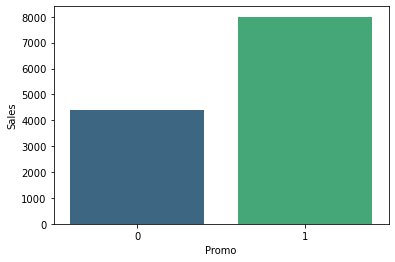

In [35]:
sns.barplot(x='Promo', y='Sales', data = train, palette='viridis')

From the above plot, it can be observed that there are more sales when there is promo compared to when there is no promo. 

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

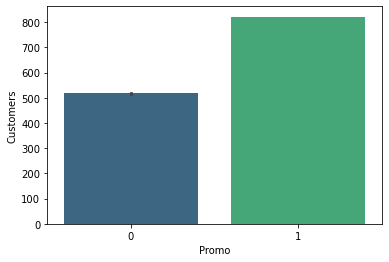

In [36]:
sns.barplot(x='Promo', y='Customers', data = train, palette='viridis')

From the above plot, it can be observed that there are more customers when there is promo compared to when there is  no promo.

From the above plots, it can be observed that there are more sales and customers when there is promo compared to when there is  no promo. This shows that Promotion has a positive effect for a store

### Further Exploratory Data Analysis¶
To gain more indepth knowledge about the data

### Feature Engineering

In [19]:
train_df = train.copy()

In [20]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


From the above, we can see that the datatype of the Date column is in object format but it should be in datetime format

##### To convert object datatype to datetime datatype

In [25]:
import datetime as dt

In [26]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [28]:
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week

In [29]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [38]:
train_df1 = train_df.copy()

In [39]:
train_df1.replace({'DayOfWeek': {7:'Sunday',1:'Monday',2:'Tuesday',
                                 3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, 
             'Month':{1:'January',2:'February',3:'March',4:'April',5:'May',
                           6:'June',7:'July',8:'August',9:'September',10:'October',
                          11:'November',12:'December'}}, inplace = True)

In [40]:
train_df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week
0,1,Friday,2015-07-31,5263,555,1,1,0,1,2015,July,31
1,2,Friday,2015-07-31,6064,625,1,1,0,1,2015,July,31
2,3,Friday,2015-07-31,8314,821,1,1,0,1,2015,July,31
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,2015,July,31
4,5,Friday,2015-07-31,4822,559,1,1,0,1,2015,July,31


Let's see how Promo affects the sales by day, month and year

In [61]:
day_order = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

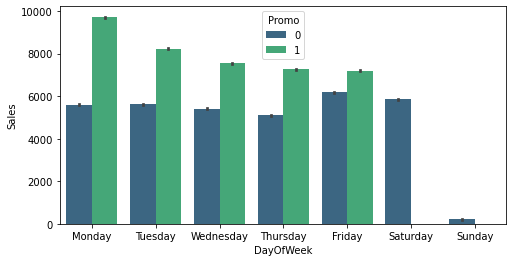

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(x='DayOfWeek', y='Sales', hue='Promo', order= day_order, data= train_df1, palette='viridis')

From the plot above, it is observed that the days that has promo sold more than the days that did not have promo, for example the Mondays that had promo sold significantly more than the Mondays without promo. Also, among the days without promo, Friday and Saturday sold more. This is because people tend to do their shoppings on weekends. Sunday sold very small compared to others.

<AxesSubplot:xlabel='Month', ylabel='Sales'>

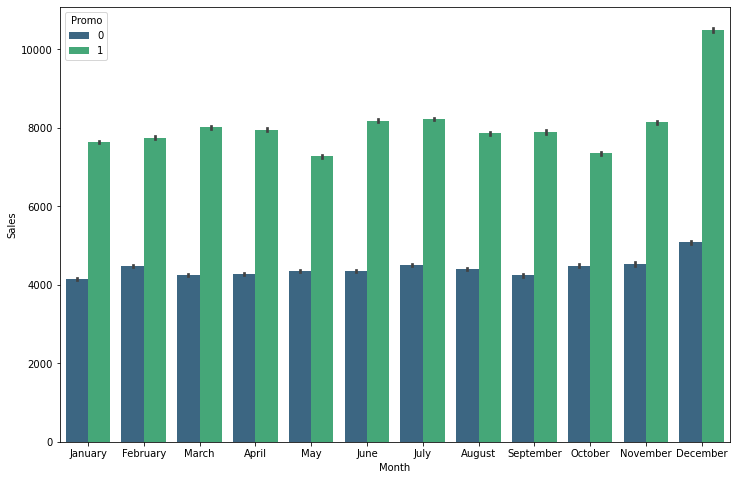

In [42]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December' ]
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Sales', hue='Promo', order= month_order, data= train_df1, palette='viridis')

From the plot above, it is observed that the sales are significantly higher when there is promotion in each month.

<AxesSubplot:xlabel='Year', ylabel='Sales'>

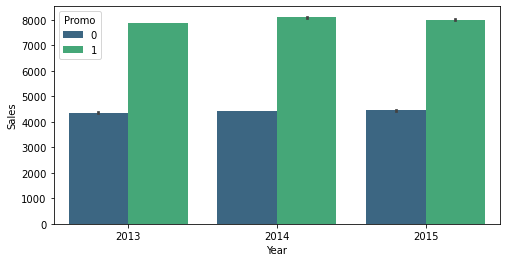

In [43]:
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Sales', hue='Promo', data= train_df1, palette='viridis')

From the plot above, it is observed that the sales are significantly higher when there is promotion in each year.

##### Merging train and store data for futher analyses

In [44]:
merged_df = store.merge(train_df1,on=['Store'],how = 'left')

In [45]:
merged_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week
0,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-31,5263,555,1,1,0,1,2015,July,31
1,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-30,5020,546,1,1,0,1,2015,July,31
2,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-29,4782,523,1,1,0,1,2015,July,31
3,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-28,5011,560,1,1,0,1,2015,July,31
4,1.0,c,a,1270.0,9.0,2008.0,0.0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-27,6102,612,1,1,0,1,2015,July,31


<AxesSubplot:xlabel='PromoInterval', ylabel='Sales'>

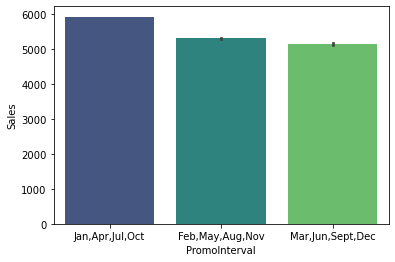

In [48]:
sns.barplot(x = 'PromoInterval',y= 'Sales', data = merged_df, palette='viridis')

The plot above shows that the Promo Interval (Jan,Apr,Jul,Oct) yields the most sales.

<AxesSubplot:xlabel='PromoInterval', ylabel='Customers'>

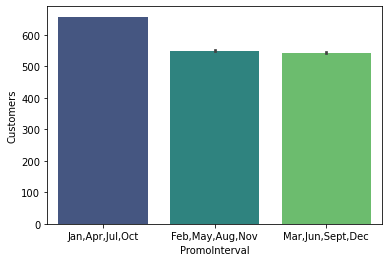

In [49]:
sns.barplot(x = 'PromoInterval',y= 'Customers', data = merged_df, palette='viridis')

The plot above shows that the Promo Interval (Jan,Apr,Jul,Oct) yields the most Customers.

# Conclusion

From all the visualizations seen above, it can be concluded that Promotions greatly affect the number of Sales and Customers. When there is promotion, there is a significant increase in the number of sales and customers. Also the Promo Interval of Jan,Apr,Jul,Oct seems to be the  most efficient because it yields the most Sales and customers.